# Import modules and libraries

In [4]:
# Import Pipeline and Gride Search CV modules for automation
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline, FeatureUnion

# Import data processing modules
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import feature generation modules
from sklearn.decomposition import PCA, NMF
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding

# Import feature selection modules
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE, RFECV

# Import classification modules
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Import Scoring modules
from sklearn.metrics import matthews_corrcoef, make_scorer, accuracy_score, roc_auc_score, roc_curve

# Import Pandas
import pandas as pd

# Import NumPy
import numpy as np

# Import Time module
import time

# Import MatPlot lib
import matplotlib.pyplot as plt
from matplotlib import pyplot

np.random.seed(11)

# 1. Impersonation data loading

In [3]:
# Assign file names
train_imperson = r"C:\Users\ricar\Documents\Career\UK\Birkbeck - Data Science MSc\Year 2\Project\Databases\Impersonation & Bondora Copy\train_imperson_without4n7_balanced_data.csv"
test_imperson = r"C:\Users\ricar\Documents\Career\UK\Birkbeck - Data Science MSc\Year 2\Project\Databases\Impersonation & Bondora Copy\test_imperson_without4n7_balanced_data.csv"

In [4]:
# Read CSV files to a dataframe with Pandas
from pandas import read_csv

train_data = read_csv(train_imperson)
test_data = read_csv(test_imperson)

In [5]:
# Check if train file was correctly read
train_data.shape

(97044, 153)

In [8]:
# Check if test file was correctly read

test_data.shape

(40158, 153)

In [9]:
# Split Data Frames into X and Y

# Train Data
x_train_df = train_data.iloc[:, 0:152]
y_train_df = train_data.iloc[:, 152]

print(x_train_df.shape[0], x_train_df.shape[1])
print(y_train_df.shape[0])

# Test Data
x_test_df = test_data.iloc[:, 0:152]
y_test_df = test_data.iloc[:, 152]

print(x_test_df.shape[0], x_test_df.shape[1])
print(y_test_df.shape[0])

97044 152
97044
40158 152
40158


In [10]:
# Transform dataframes into arrays

# Train Data
x_train_values = x_train_df.values
y_train_values = y_train_df.values

print(len(x_train_values))
print(len(y_train_values))

# Test Data
x_test_values = x_test_df.values
y_test_values = y_test_df.values

print(len(x_test_values))
print(len(y_test_values))

# Check if train data is correct 
print(x_train_values[78000])
print(y_train_values[78000])


# Check if test data is correct 
print(x_test_values[24000])
print(y_test_values[24000])


97044
97044
40158
40158
[0.0000e+00 0.0000e+00 0.0000e+00 5.8470e-03 5.8470e-03 3.7908e-02
 3.7908e-02 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 7.6598e-01
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 9.8108e-01 0.0000e+00 1.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 6.3380e-01 1.0000e+00
 0.0000e+00 7.2727e-01 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00
 0.0000e+00 5.6338e-04 5.8824e-03 1.7311e-03 5.4724e-03 1.4745e-03
 0.0000e+00 8.6691e-02 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 1.0000e+00 0.00

# 2. Data pre-processing

### 1. Check if there are missing values and handle them if necessary

> Train data

In [11]:
# Count number of missing values in each variable
train_data.isnull().sum()


1      0
2      0
3      0
5      0
6      0
      ..
151    0
152    0
153    0
154    0
155    0
Length: 153, dtype: int64

In [12]:
# Count the total number of missing values
train_data.isnull().sum().sum()

0

> Test data

In [13]:
test_data.isnull().sum()

1      0
2      0
3      0
5      0
6      0
      ..
151    0
152    0
153    0
154    0
155    0
Length: 153, dtype: int64

In [14]:
test_data.isnull().sum().sum()

0

### 2. Check if there are text and categorical attributes and convert to numbers if necessary

> Train Data

In [15]:
train_data.dtypes.value_counts()

int64      105
float64     48
dtype: int64

> Test Data

In [16]:
test_data.dtypes.value_counts()

int64      111
float64     42
dtype: int64

# Generate Features & Append to Original Dataset

> Train Data

In [17]:
# Generate new features with PCA
pd.set_option('display.max_columns', None)

pipe_pca = Pipeline([("scaler", StandardScaler()),
                     ("pca", PCA(n_components = 0.95))])

pipe_pca.fit(x_train_values)
pca_new_features = pipe_pca.transform(x_train_values)
pca_new_features_df = pd.DataFrame(pca_new_features)

# Generate new features with LDA
pipe_lda = Pipeline([("scaler", StandardScaler()),
                     ("lda", LinearDiscriminantAnalysis())])

pipe_lda.fit(x_train_values, y_train_values)
lda_new_features = pipe_lda.transform(x_train_values)
lda_new_features_df = pd.DataFrame(lda_new_features)


# Combine generated features with the original dataset
combined_x_train_df = pd.concat((x_train_df, pca_new_features_df, lda_new_features_df), axis = 1)
combined_x_train_values = combined_x_train_df.values

print("Genrated dataset info: \n")
print(pca_new_features_df.info())
print(lda_new_features_df.info())

print("Combined dataset info: \n")
print(combined_x_train_df.info())

combined_x_train_df.head()
# print(pca_combined_x_train_values)

Genrated dataset info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97044 entries, 0 to 97043
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       97044 non-null  float64
 1   1       97044 non-null  float64
 2   2       97044 non-null  float64
 3   3       97044 non-null  float64
 4   4       97044 non-null  float64
 5   5       97044 non-null  float64
 6   6       97044 non-null  float64
 7   7       97044 non-null  float64
 8   8       97044 non-null  float64
 9   9       97044 non-null  float64
 10  10      97044 non-null  float64
 11  11      97044 non-null  float64
 12  12      97044 non-null  float64
 13  13      97044 non-null  float64
 14  14      97044 non-null  float64
 15  15      97044 non-null  float64
 16  16      97044 non-null  float64
 17  17      97044 non-null  float64
 18  18      97044 non-null  float64
 19  19      97044 non-null  float64
 20  20      97044 non-null  float64
 21  21      97

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,0
0,0,0,0,0.000066,0.000066,0.009150,0.009150,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36865,0,0,0,0,1,0,0,0,0.88679,0.98108,0,0,1,1,0,0,0,0,0,0,0,0,0.70423,1,0,0.81818,0,1.0,0.30769,0.5,0,0,1,0,0,0,0.003034,0.001127,0.011765,0.001443,0.001440,0.001474,0,0.946280,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,-0.793746,0.358389,0.936245,1.384036,-0.177306,0.047030,0.926724,0.469243,-1.802891,0.514543,-0.202719,0.211952,0.284962,0.090752,-0.607705,0.113638,0.210934,-0.240584,-0.641406,-0.016468,0.050153,-0.700348,0.258618,1.399881,-2.276848,1.519810,-0.538051,0.311813,-2.354141,0.402896,1.189181,-4.962252
1,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36867,0,0,0,0,1,0,0,0,0.43396,0.98108,0,0,1,1,0,0,0,0,0,0,0,0,0.70423,1,0,0.65909,0,0.5,1.00000,0.0,0,0,0,0,0,0,0.000000,0.002253,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0,0.0,0.0,0,0,0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0.093564,0.031017,0.611543,2.709119,-0.464712,0.079526,0.930999,1.155320,-3.293363,0.839610,-0.928336,0.633663,0.397601,0.129992,-0.626999,0.353551,-0.155568,-0.120798,-0.360451,-0.022142,0.038375,-0.360128,-0.118456,0.642838,-1.040660,0.656417,-0.186184,0.150592,-0.515382,1.041566,-0.951151,-4.356062
2,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36871,0,0,0,0,1,0,0,0,0.00000,0.98108,0,1,0,1,0,0,0,0,0,0,0,0,0.59155,1,0,0.18182,0,0.0,0.61538,0.0,0,0,0,0,0,0,0.000000,0.000563,0.005882,0.001731,0.001728,0.001474,0,0.255430,0,0,0,0,0,0.0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.048053,0.00153,0.0,0.0,0,0.0,0.0,0,0,0,0.0,1,0.001459,0.46154,0.000000,0.007937,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,8.685105,-3.113956,2.448330,0.297782,-0.324963,-0.227511,-4.917635,1.274853,-1.683674,-0.359185,2.526068,0.566029,-0.924237,0.013708,0.198816,-0.437165,0.179894,0.128119,-0.849488,-0.171592,-0.042745,-0.766064,-0.035480,0.738166,-2.468436,-1.010280,0.154988,0.190190,-1.406437,2.014263,-1.350272,-3.993104
3,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36876,0,0,0,0,1,0,0,0,0.00000,0.98108,0,1,0,1,0,0,0,0,0,0,0,0,0.14085,1,0,0.18182,0,0.0,0.61538,0.0,0,0,0,0,0,0,0.000000,0.000563,0.005882,0.000866,0.000864,0.000885,0,0.072772,0,0,0,0,0,0.0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.168300,0.00153,0.0,0.0,0,0.0,0.0,0,0,0,0.0,1,0.000875,0.46154,0.000000,0.003968,0,0,0.0,0.000015,0.007843,0.000031,0.000016,1,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,16.384446,-6.719312,7.573588,-6.463732,-0.491088,0.516623,6.939489,-1.060132,-0.392747,0.310733,-2.587071,-0.601204,-0.441643,0.060522,-0.332299,-0.352885,-0.031812,-0.097153,-0.991821,-0.423138,-0.224478,-0.245307,-0.010789,-0.244618,-1.542785,-1.108509,0.444967,0.072946,-0.877060,1.787433,-1.857963,-5.444641
4,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,

> Test Data

In [18]:
pd.set_option('display.max_columns', None)

# Generate new features with PCA
pca_new_features = pipe_pca.transform(x_test_values)
pca_new_features_df = pd.DataFrame(pca_new_features)


# Generate new features with LDA
lda_new_features = pipe_lda.transform(x_test_values)
lda_new_features_df = pd.DataFrame(lda_new_features)


# Combine generated features with the original dataset
combined_x_test_df = pd.concat((x_test_df, pca_new_features_df, lda_new_features_df), axis = 1)
combined_x_test_values = combined_x_test_df.values


print("Genrated dataset info: \n")
print(pca_new_features_df.info())
print(lda_new_features_df.info())

print("Combined dataset info: \n")
print(combined_x_test_df.info())

combined_x_test_df.head()
# print(pca_combined_x_test_values)

Genrated dataset info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40158 entries, 0 to 40157
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       40158 non-null  float64
 1   1       40158 non-null  float64
 2   2       40158 non-null  float64
 3   3       40158 non-null  float64
 4   4       40158 non-null  float64
 5   5       40158 non-null  float64
 6   6       40158 non-null  float64
 7   7       40158 non-null  float64
 8   8       40158 non-null  float64
 9   9       40158 non-null  float64
 10  10      40158 non-null  float64
 11  11      40158 non-null  float64
 12  12      40158 non-null  float64
 13  13      40158 non-null  float64
 14  14      40158 non-null  float64
 15  15      40158 non-null  float64
 16  16      40158 non-null  float64
 17  17      40158 non-null  float64
 18  18      40158 non-null  float64
 19  19      40158 non-null  float64
 20  20      40158 non-null  float64
 21  21      40

,1,2,3,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,0
0,0,0,0,0.002547,0.002547,0.98824,0.98824,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88219,0,0,0,0,1,0,0,0,1.00000,0.98108,0,0,1,1,0,0,0,0,0,0,0,0,0.69231,1,0,0.90909,0,1.0,0.61538,1.0,0,0,0,0,1,0,0.003034,0.005291,0.000343,0.002146,0.000128,0.00241,0.0,0.57753,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.22215,0.0,0.47729,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.98674,-5.377099,2.191622,3.473807,2.610440,-185.754803,24.236252,-23.687184,-132.002600,-23.616173,-1.530341,2.142122,2.647700,-5.510821,-7.858886,5.391051,1.960530,2.346691,-31.946421,1.145297,-0.250812,0.630639,3.268037,0.129061,1.348732,1.084898,13.101728,31.104069,-3.163901,1.383860,-0.992205,0.360841,-3.344798
1,0,0,0,0.003296,0.003296,0.98824,0.98824,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,1,0,0,0,1.00000,0.98108,0,0,1,1,0,0,0,0,0,0,0,0,0.69231,1,0,0.90909,0,1.0,0.61538,1.0,0,0,0,0,1,0,0.003034,0.005291,0.000343,0.002146,0.000128,0.00241,0.0,0.58559,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.35106,0.0,0.18516,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.98674,-5.282390,2.160716,3.424390,2.706444,-185.760486,24.236852,-23.687723,-131.985746,-23.672641,-1.444646,2.160162,2.670589,-5.437112,-7.852616,5.359087,1.974243,2.325703,-31.949852,1.169995,-0.250406,0.630586,3.313355,0.174043,1.168087,1.112661,13.044560,31.131784,-3.194305,1.667048,-1.044970,0.096791,-3.156612
2,0,0,0,0.003285,0.003285,0.98824,0.98824,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,1,0,0,0,1.00000,0.98108,0,0,1,1,0,0,0,0,0,0,0,0,0.67949,1,0,0.90909,0,1.0,0.61538,1.0,0,0,0,0,1,0,0.003034,0.005291,0.000343,0.002146,0.000128,0.00241,0.0,0.59096,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.43700,0.0,0.47541,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.98674,-5.464698,2.228909,3.546985,2.457753,-185.739791,24.235657,-23.721112,-132.046685,-23.504298,-1.647809,2.190734,2.615781,-5.485750,-7.854239,5.369987,1.935507,2.368752,-31.945445,1.132083,-0.247294,0.626580,3.221114,0.021266,1.603916,1.377092,12.804274,31.174948,-3.176175,1.481401,-0.910796,0.178505,-3.270881
3,0,0,0,0.005942,0.005942,0.00000,0.00000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,1,0,0,0,0.43396,0.98108,0,0,1,1,0,0,0,0,0,0,0,0,0.75641,1,0,0.65909,0,0.5,1.00000,0.0,0,0,0,0,0,0,0.000000,0.015873,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.0,0.00000,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.00000,-1.962856,0.860498,-1.416165,4.915398,-186.321394,24.283246,-22.805671,-130.761529,-26.670034,-0.906671,1.304897,3.587896,-4.878973,-7.788175,4.942373,3.059092,2.169716,-31.998240,1.009909,-0.193770,0.712317,3.305047,-0.210184,2.648562,1.200497,13.550852,30.861287,-3.164567,1.861390,-1.103893,-0.243682,-3.070426
4,0,0,0,0.001519,0.001519,0.98824,0.98824,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,1,0,0,0,1.00000,0.98108,0,0,1,1,0,0,0,0,0,0,0,0,0.69231,1,0,0.90909,0,1.0,0.61538,1.0,0,1,0,0,1,0,0.003034,0.

### Principal Component Analysis Visualisation

[0.16396857 0.15368857 0.09936111 0.06515682 0.0439712  0.03926195
 0.03615949 0.03152739 0.02756861 0.02500432 0.02233895 0.02112627
 0.01881959 0.01740773 0.01714717 0.01530086 0.01417061 0.01357051
 0.01300148 0.01290575 0.01282709 0.01204276 0.0116137  0.01082546
 0.00957732 0.00902328 0.0085478  0.00743105 0.00726423 0.00708292
 0.00682458]


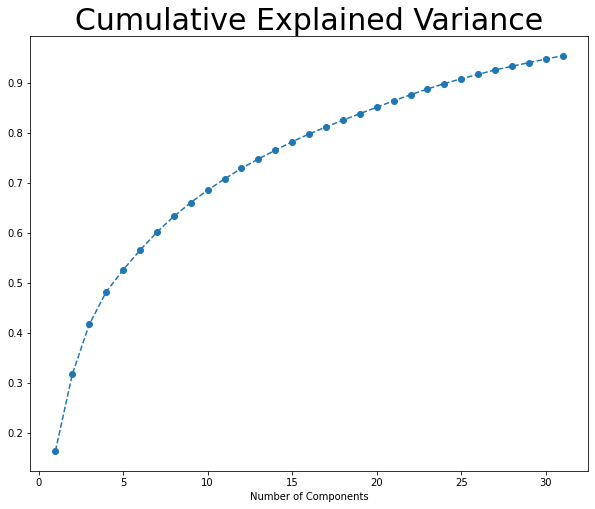

In [19]:
# Cumulative Explained Variance
print(pipe_pca["pca"].explained_variance_ratio_)
n_pcs = len(pipe_pca["pca"].explained_variance_ratio_)

plt.figure(figsize = (10, 8))
plt.plot(range(1, n_pcs+1), pipe_pca["pca"].explained_variance_ratio_.cumsum(), marker="o", linestyle="--")

plt.rc('font', size=20)
plt.rc('axes', titlesize=30)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.show()

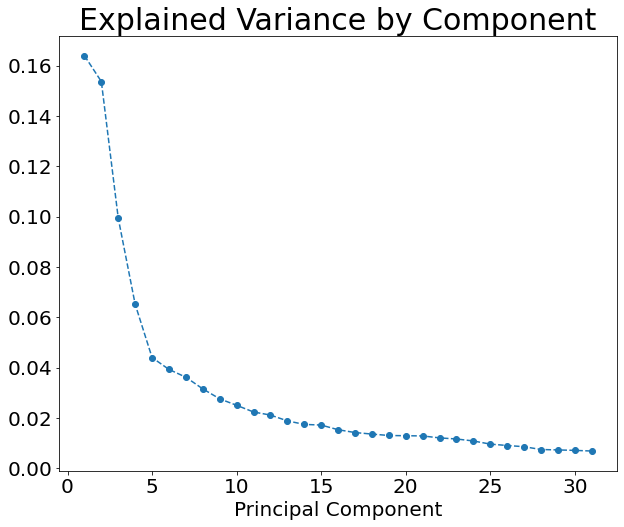

In [20]:
# Explained Variance by PC
plt.figure(figsize = (10, 8))
plt.plot(range(1, n_pcs+1), pipe_pca["pca"].explained_variance_ratio_, marker="o", linestyle="--")

plt.rc('font', size=20)
plt.rc('axes', titlesize=30)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

plt.title("Explained Variance by Component")
plt.xlabel("Principal Component")
plt.show()

# Pipeline

### 3. Create Pipeline for each Classification algorithm

> Logistic Regression

In [21]:
# Create Pipeline with data processing, feature generation and classification methods
pipe_logreg = Pipeline([("data_process", "passthrough"),
                     ("f_selection", "passthrough"),
                     ("classify", LogisticRegression())])

> Random Forest

In [22]:
# Create Pipeline with data processing, feature generation and classification methods
pipe_rf = Pipeline([("data_process", "passthrough"),
                     ("f_selection", "passthrough"),
                     ("classify", RandomForestClassifier())])

> RBF Support Vector Machine

In [23]:
# Create Pipeline with data processing, feature generation and classification methods
pipe_svm = Pipeline([("data_process", "passthrough"),
                     ("f_selection", "passthrough"),
                     ("classify", SVC(kernel="rbf"))])

### 4. Create and Fit Param Grids

> Logistic Regression

In [24]:
# Create grid with parameters to test accurracy using k-Fold CV
param_grid_logreg = [
        {
        "data_process": [MinMaxScaler(), StandardScaler()],
        "f_selection": [SelectKBest(score_func = f_classif)],
        "f_selection__k": [10, 15],
        "classify__solver": ["liblinear", "lbfgs"],
        },
        {
        "data_process": [MinMaxScaler(), StandardScaler()],
        "f_selection": [RFE(estimator = LogisticRegression(solver="liblinear"), step = 10)],
        "f_selection__n_features_to_select": [10, 15],
        "classify__solver": ["liblinear", "lbfgs"],
        }
]

scoring = {"accuracy": "accuracy",
           "roc_auc": "roc_auc",
           "MMC": make_scorer(matthews_corrcoef)
          }




sart_ttime = time.time()

grid_logreg = GridSearchCV(pipe_logreg, param_grid=param_grid_logreg, scoring=scoring, refit="accuracy", cv=5, n_jobs=-1)
grid_logreg.fit(combined_x_train_values, y_train_values)
# [40524:56524]

print(f"Time taken (m): {round((time.time()-sart_ttime)/60,0)}")

KeyboardInterrupt: 

> Random Forest

In [ ]:
# Create grid with parameters to test accurracy using k-Fold CV
param_grid_rf = [
        {
        "data_process": [MinMaxScaler(), StandardScaler()],
        "f_selection": [SelectKBest(score_func = f_classif)],
        "f_selection__k": [10, 15],
        "classify__n_estimators": [100],
        },
        {
        "data_process": [MinMaxScaler(), StandardScaler()],
        "f_selection": [RFE(estimator = LogisticRegression(solver="liblinear"), step = 10)],
        "f_selection__n_features_to_select": [10, 15],
        "classify__n_estimators": [100],
        }
]

scoring = {"accuracy": "accuracy",
           "roc_auc": "roc_auc",
           "MMC": make_scorer(matthews_corrcoef)
          }




sart_ttime = time.time()

grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid_rf, scoring=scoring, refit="accuracy", cv=5, n_jobs=-1)
grid_rf.fit(combined_x_train_values, y_train_values)
# [40524:56524]

print(f"Time taken (m): {round((time.time()-sart_ttime)/60,0)}")

> RBF Support Vector Machine

In [ ]:
# Create grid with parameters to test accurracy using k-Fold CV
param_grid_svm = [
        {
        "data_process": [MinMaxScaler(), StandardScaler()],
        "f_selection": [SelectKBest(score_func = f_classif)],
        "f_selection__k": [10, 15],
        "classify__C": [0.1, 1, 10],
        "classify__gamma": ["scale"],
        },
        {
        "data_process": [MinMaxScaler(), StandardScaler()],
        "f_selection": [RFE(estimator = LogisticRegression(solver="liblinear"), step = 10)],
        "f_selection__n_features_to_select": [10, 15],
        "classify__C": [0.1, 1, 10],
        "classify__gamma": ["scale"],
        }
]

scoring = {"accuracy": "accuracy",
           "roc_auc": "roc_auc",
           "MMC": make_scorer(matthews_corrcoef)
          }




sart_ttime = time.time()

grid_svm = GridSearchCV(pipe_svm, param_grid=param_grid_svm, scoring=scoring, refit="accuracy", cv=5, n_jobs=-1)
grid_svm.fit(combined_x_train_values, y_train_values)
# [40524:56524]

print(f"Time taken (m): {round((time.time()-sart_ttime)/60,0)}")

### 5. Review Grid Search Results and Analyse Best Estimators

> Logistic Regression

In [ ]:
print(f"Best Score: {grid_logreg.best_score_}\n")
print(f"Best Estimator: {grid_logreg.best_estimator_}\n")
print(f"Best Parameters: {grid_logreg.best_params_}\n")

pd.set_option('display.max_columns', None)
pd.DataFrame(grid_logreg.cv_results_).sort_values(by=['rank_test_accuracy']).head()


> Random Forest

In [ ]:
print(f"Best Score: {grid_rf.best_score_}\n")
print(f"Best Estimator: {grid_rf.best_estimator_}\n")
print(f"Best Parameters: {grid_rf.best_params_}\n")

pd.set_option('display.max_columns', None)
pd.DataFrame(grid_rf.cv_results_).sort_values(by=['rank_test_accuracy']).head()


> RBF Support Vector Machine

In [ ]:
print(f"Best Score: {grid_svm.best_score_}\n")
print(f"Best Estimator: {grid_svm.best_estimator_}\n")
print(f"Best Parameters: {grid_svm.best_params_}\n")

pd.set_option('display.max_columns', None)
pd.DataFrame(grid_svm.cv_results_).sort_values(by=['rank_test_accuracy']).head()


### 6. Iterrogate each Pipeline step

> Logistic Regression

In [ ]:
print("Feature Selection Attributes:")
print(f"Number of features used in feature selection: {grid_logreg.best_estimator_.named_steps['f_selection'].n_features_in_}")
print(f"The number of selected features: {grid_logreg.best_estimator_.named_steps['f_selection'].n_features_}")
print(f"The mask of selected features: {grid_logreg.best_estimator_.named_steps['f_selection'].support_}")
print(f"The feature ranking: {grid_logreg.best_estimator_.named_steps['f_selection'].ranking_}")
print(f"Number of Features used in training: {grid_logreg.best_estimator_.named_steps['classify'].n_features_in_}")

print("")

print("Classifier Attributes:")
print(f"Coeficients: {grid_logreg.best_estimator_.named_steps['classify'].coef_}")
print(f"Intercept: {grid_logreg.best_estimator_.named_steps['classify'].intercept_}")

> Random Forest

In [ ]:
print("Feature Selection Attributes:")
# print(f"Scores of features: {grid_rf.best_estimator_.named_steps['f_selection'].scores_}")
print(f"Number of features seen during fit: {grid_rf.best_estimator_.named_steps['f_selection'].n_features_in_}")

print("")

print("Classifier Attributes:")
print(f"Number of Features used in training: {grid_rf.best_estimator_.named_steps['classify'].n_features_in_}")
print(f"The number of outputs when fit is performed: {grid_rf.best_estimator_.named_steps['classify'].n_outputs_}")
print(f"The impurity-based feature importances: {grid_rf.best_estimator_.named_steps['classify'].feature_importances_}")


> RBF Support Vector Machine

In [ ]:
print("Feature Selection Attributes:")
print(f"Number of features used in feature selection: {grid_svm.best_estimator_.named_steps['f_selection'].n_features_in_}")
print(f"The number of selected features: {grid_svm.best_estimator_.named_steps['f_selection'].n_features_}")
print(f"The mask of selected features: {grid_svm.best_estimator_.named_steps['f_selection'].support_}")
print(f"The feature ranking: {grid_svm.best_estimator_.named_steps['f_selection'].ranking_}")
print(f"Number of Features used in training: {grid_svm.best_estimator_.named_steps['classify'].n_features_in_}")

print("")

print("Classifier Attributes:")
# print(f"Support vectors: {grid_svm.best_estimator_.named_steps['classify'].support_vectors_}")
print(f"Number of support vectors for each class: {grid_svm.best_estimator_.named_steps['classify'].n_support_}")

# Fit and Predict the best estimators using Train and Test datasets

> Logistic Regression

In [ ]:
# Create Pipeline with best estimators, fit and predict final model
pipe_final_logreg = Pipeline([
                            ("data_process", StandardScaler()),
                            ("f_selection", RFE(estimator = LogisticRegression(solver="liblinear"),
                                         step = 10,
                                         n_features_to_select = 15)),
                            ("classify", LogisticRegression(solver="liblinear"))])

sart_ttime = time.time()

pipe_final_logreg.fit(combined_x_train_values, y_train_values)
predicted_logreg = pipe_final_logreg.predict(combined_x_test_values)
probs_logreg = pipe_final_logreg.predict_proba(combined_x_test_values)[:, 1]

print(f"Time taken (m): {round((time.time()-sart_ttime)/60,0)}")


In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test_values, predicted_logreg)
mcc = matthews_corrcoef(y_test_values, predicted_logreg)
roc_auc = roc_auc_score(y_test_values, probs_logreg)

print(accuracy)
print(mcc)
print(roc_auc)

In [ ]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_values, probs_logreg)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")
# show the plot
pyplot.show()

In [ ]:
# Iterrogate the best estimator on the final Logistic Regression model

print("Feature Selection Attributes:")
print(f"Number of features used in feature selection: {pipe_final_logreg.named_steps['f_selection'].n_features_in_}")
print(f"The number of selected features: {pipe_final_logreg.named_steps['f_selection'].n_features_}")
print(f"The mask of selected features: {pipe_final_logreg.named_steps['f_selection'].support_}")
print(f"The feature ranking: {pipe_final_logreg.named_steps['f_selection'].ranking_}")
print(f"Number of Features used in training: {pipe_final_logreg.named_steps['classify'].n_features_in_}")

print("")

print("Classifier Attributes:")
print(f"Coeficients: {pipe_final_logreg.named_steps['classify'].coef_}")
print(f"Intercept: {pipe_final_logreg.named_steps['classify'].intercept_}")

In [ ]:
df1 = pd.DataFrame(pipe_final_logreg.named_steps['f_selection'].support_)
df1.to_excel("output.xlsx") 

> Random Forest

In [ ]:
# Create Pipeline with best estimators, fit and predict final model
pipe_final_rf = Pipeline([
                            ("data_process", MinMaxScaler()),
                            ("f_selection", SelectKBest(k = 15)),
                            ("classify", RandomForestClassifier())])

sart_ttime = time.time()

pipe_final_rf.fit(combined_x_train_values, y_train_values)
predicted_rf = pipe_final_rf.predict(combined_x_test_values)
probs_rf = pipe_final_rf.predict_proba(combined_x_test_values)[:, 1]

print(f"Time taken (m): {round((time.time()-sart_ttime)/60,0)}")


In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test_values, predicted_rf)
mcc = matthews_corrcoef(y_test_values, predicted_rf)
roc_auc = roc_auc_score(y_test_values, probs_rf)

print(accuracy)
print(mcc)
print(roc_auc)

In [ ]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_values, probs_rf)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

> Support Vector Machine

In [ ]:
# Create Pipeline with best estimators, fit and predict final model
pipe_final_svm = Pipeline([
                            ("data_process", StandardScaler()),
                            ("f_selection", RFE(estimator = LogisticRegression(solver="liblinear"),
                                         step = 10,
                                         n_features_to_select = 15)),
                            ("classify", SVC(kernel='rbf', C=0.1, gamma='scale'))])

sart_ttime = time.time()

pipe_final_svm.fit(combined_x_train_values, y_train_values)
predicted_svm = pipe_final_svm.predict(combined_x_test_values)
# probs_svm = pipe_final_svm.predict_proba(combined_x_test_values)[:, 1]

print(f"Time taken (m): {round((time.time()-sart_ttime)/60,0)}")


In [ ]:
# Evaluate performance
accuracy = accuracy_score(y_test_values, predicted_svm)
mcc = matthews_corrcoef(y_test_values, predicted_svm)
# roc_auc = roc_auc_score(y_test_values, probs_svm)

print(accuracy)
print(mcc)
# print(roc_auc)